<a href="https://colab.research.google.com/github/BODDUSRIPAVAN/Analysis_on_Hand_Written_Alphabet_Recognition_As_An_Application_of_Linear_Algebra/blob/main/handwritten_alphabet_recognition_using_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis on Hand Written Alphabet Recognition As An Application of Linear Algebra
##Boddu Sri Pavan(Programming and relative study), N180606, E-3, CSE, RGUKT IIIT NUZVID
##Karra Samarpan(Data Collection), N181086, E-3, CSE, RGUKT IIIT NUZVID
### Linear Agebra is vast. It is applied everywhere knowingly or unknowingly. One of it's application is hand-written alphabet recognition using statistical techniques.

## Assumptions:
### For this study the following are assumed to be True
#### 1) All samples are uppercase English alphabets.
#### 2) Every sample is reshaped into 50X50 array.
#### 3) Samples are created with black colored marker.
#### 4) The background is having noise up an average extent.
#### 5) In sentence, all the letters are assumed to maintain some space

In [ ]:
# Importing necessary libraries
import cv2
from google.colab.patches import cv2_imshow as imshow
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

For this study, a sample dataset of 78 uppercase English alphabets(each alphabet with 3 samples) is taken and each of it is named as a1,a2,a3,b1,b2,b3,...,z3 in jpeg format.

In [ ]:
alpha_names=[]
for i in "abcdefghijklmnopqrstuvwxyz":
  for j in range(1,4):
    alpha_names.append((str(i)+str(j)))
alpha=[i for i in "abcdefghijklmnopqrstuvwxyz"]

### User-defined function for pre-processing the number such that if alphabet is too small in the picture, then it will automatically cropped such that the alphabet will fit into screen and reshaped to (50,50) array.

In [ ]:
def preprocessing(a1):
  # Converting image ---> Binary image
  (thresh, im_bw) = cv2.threshold(a1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  thresh = 127
  a1_bw = cv2.threshold(a1, thresh, 255, cv2.THRESH_BINARY)[1]

  a1=cv2.resize(a1_bw,(50,50))  # Resizing image

  # Preprocessing image to fit for screen
  l=[]
  for i in a1:  
    l.append((i==255).sum()>48)
  start=l.index(False)
  end=50-l[::-1].index(False)
  a1=a1[start:end+1,:]
  a1=cv2.resize(a1,(50,50))
  l=[]
  for i in range(50):
    temp=a1[:,i]
    l.append(50-(temp==255).sum()>=3)
  left=l.index(True)
  right=50-l[::-1].index(True)
  a1=a1[:,left:right+1]
  a1=cv2.resize(a1,(50,50))
  #imshow(a1)
  return a1

In [ ]:
### Preprocessing the input data
alpha_arr=[]
temp=1
for i in range(len(alpha_names)):
  serial=alpha_names[i]
  image=cv2.imread("/content/"+serial+".jpeg",cv2.IMREAD_GRAYSCALE)
  alpha_arr.append(preprocessing(image))
  if(i==1):
    temp=preprocessing(image)
alpha_arr=np.array(alpha_arr) # Array holding all the training data

### User-defined function to predict the alphabet using Euclidean distance metric
#### 1) Test letter is taken as input, preprocessed.
#### 2) Distance between every training sample and itself is calculated and stored in a list.
#### 3) The training sample(alphabet) which is less distant from the test sample is considered as prediction. Since, the distance is inversey proportional to similarity.
##### Note: A plot is included to understand how the distance between test sample and other training sample varies. The prediction is included in it's title.

In [ ]:
def predict(test):
  test=preprocessing(test)
  scores=[]
  for i in range(len(alpha_arr)):
    scores.append(abs(sqrt(((test-alpha_arr[i])**2).sum()))/255)
  plt.figure(figsize=(15,7))
  plt.plot(scores,c="red")
  plt.ylabel("Euclidean Distance")
  plt.xlabel("Alphabets")
  plt.gca().fill_between(range(len(scores)),
                         [0]*len(scores),
                         scores,
                         alpha=0.5,
                         color="lime")
  plt.title("Character Identified is = "+alpha[(scores.index(min(scores)))//3].upper()+" at index = "+str(scores.index(min(scores))))

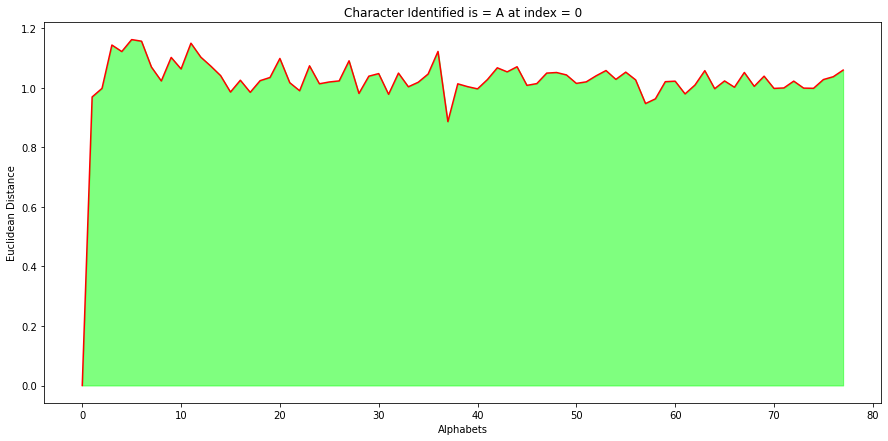

In [ ]:
# Checking with a smaple from the training data itself
test=cv2.imread("/content/a1.jpeg",cv2.IMREAD_GRAYSCALE)
character=predict(test)

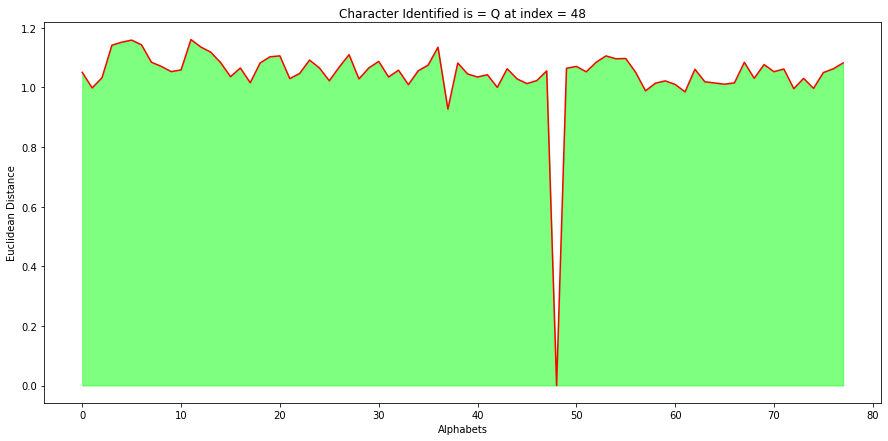

In [ ]:
# Checking with a smaple from the training data itself
test=cv2.imread("/content/q1.jpeg",cv2.IMREAD_GRAYSCALE)
character=predict(test)

### Test Samples :-
####1. W
####2. A
####3. X
####4. M
####5. P
####6. U
####7. O
####8. T

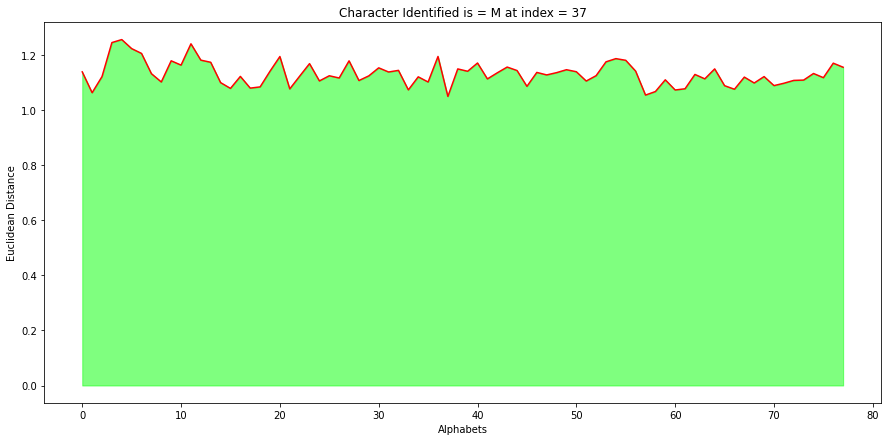

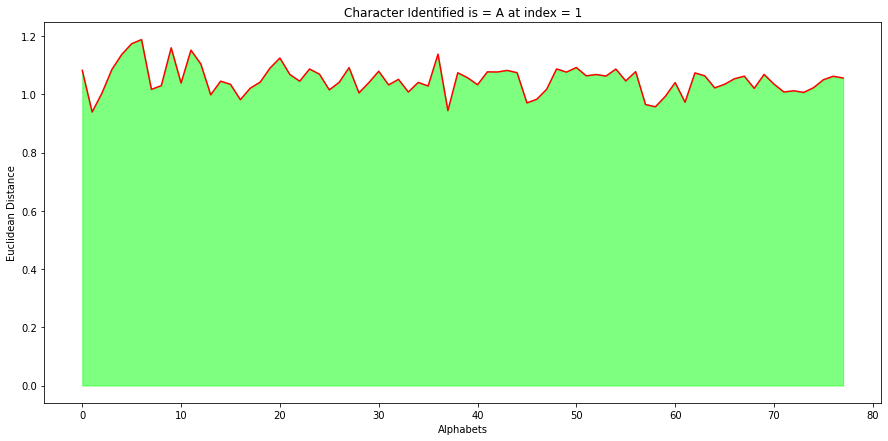

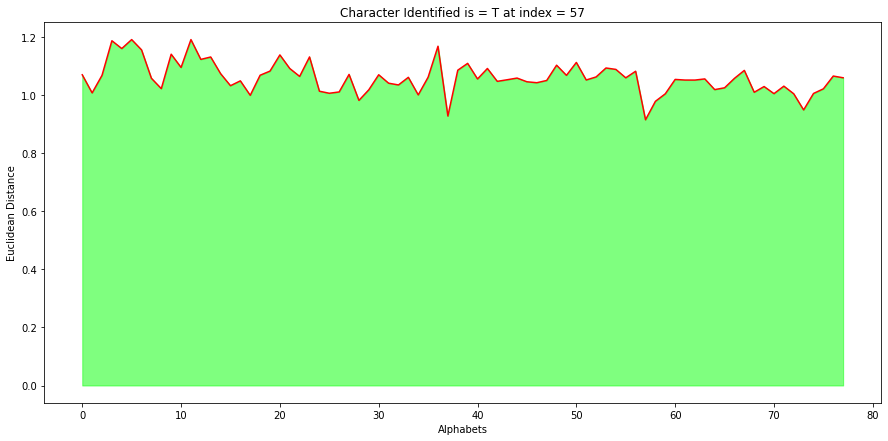

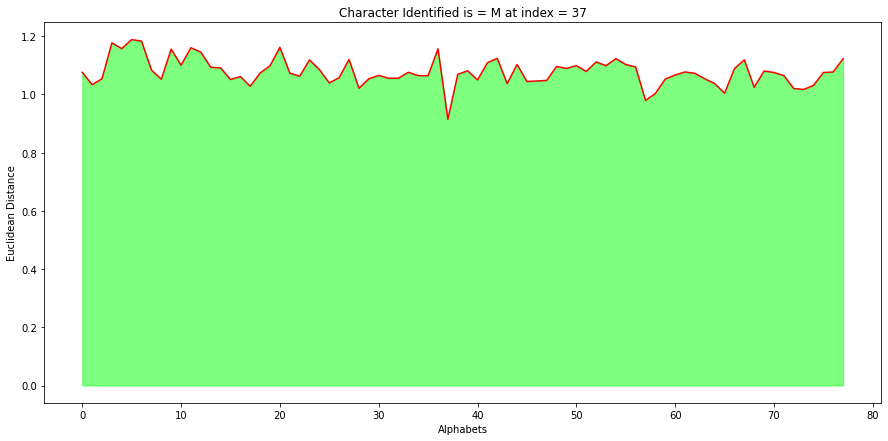

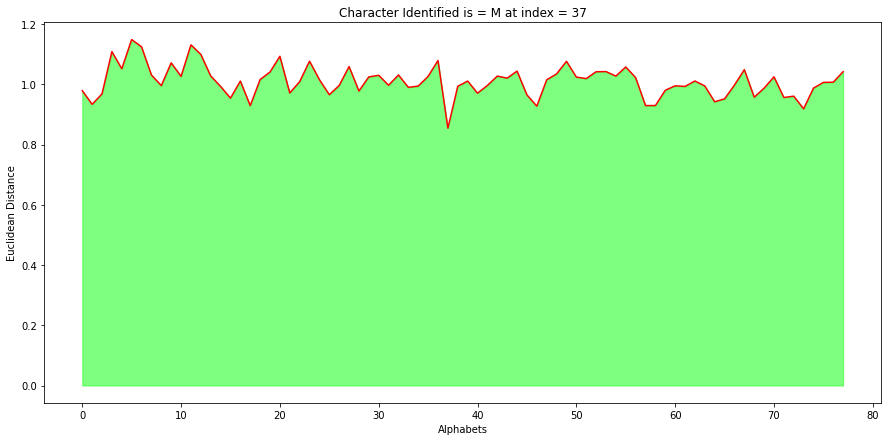

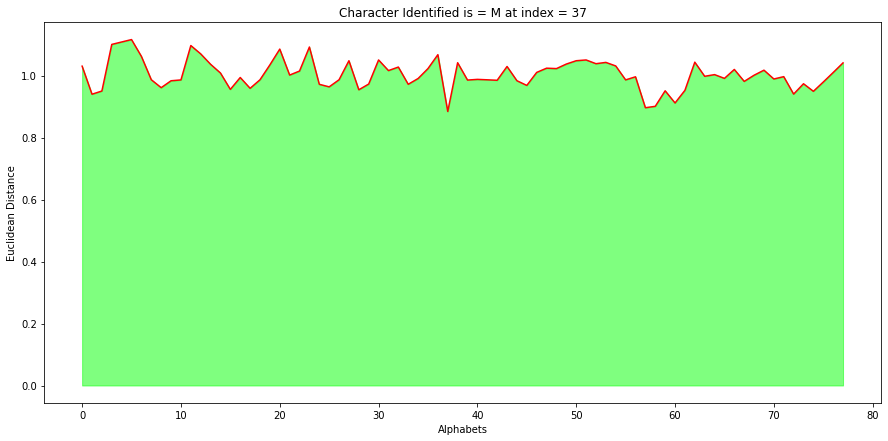

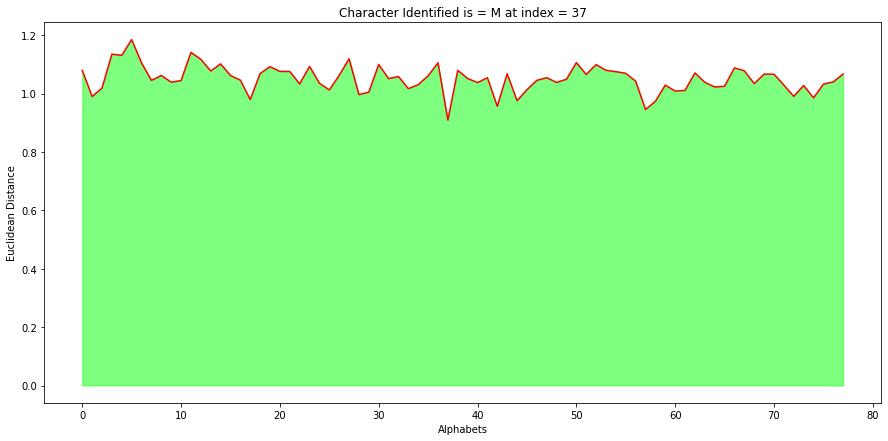

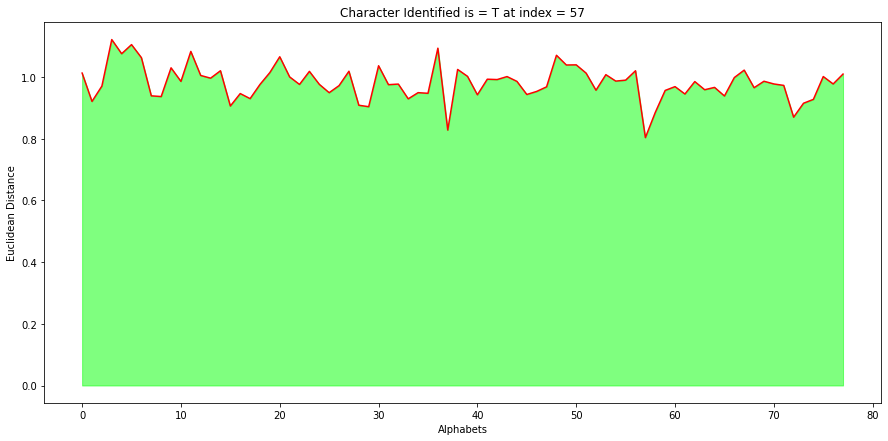

In [ ]:
testing=[i for i in "test_1 test_2 test_3 test_4 test_5 test_6 test_7 test_8".split()]
for i in testing:
  test=cv2.imread("/content/"+i+".jpeg",cv2.IMREAD_GRAYSCALE)
  character=predict(test)

# Using Jaccard Distance to find similarity between handwritten alphabets

In [ ]:
from scipy.spatial import distance

In [ ]:
def predict_jaccard(test):
  test=preprocessing(test)
  scores=[]
  for i in range(len(alpha_arr)):
    scores.append(distance.jaccard(test.flatten(),alpha_arr[i].flatten()))
  plt.figure(figsize=(15,7))
  plt.plot(scores,c="green")
  plt.ylabel("Euclidean Distance")
  plt.xlabel("Alphabets")
  plt.gca().fill_between(range(len(scores)),
                         [0]*len(scores),
                         scores,
                         alpha=0.9,
                         color="pink")
  plt.title("Character Identified is = "+alpha[(scores.index(min(scores)))//3].upper()+" at index = "+str(scores.index(min(scores))))

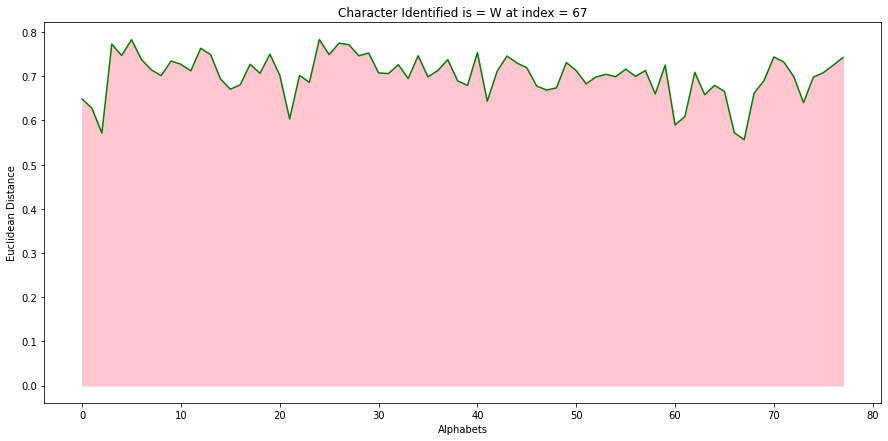

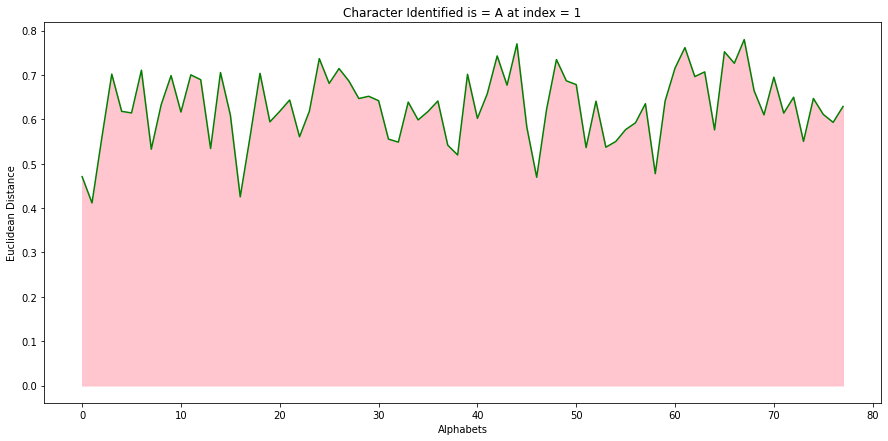

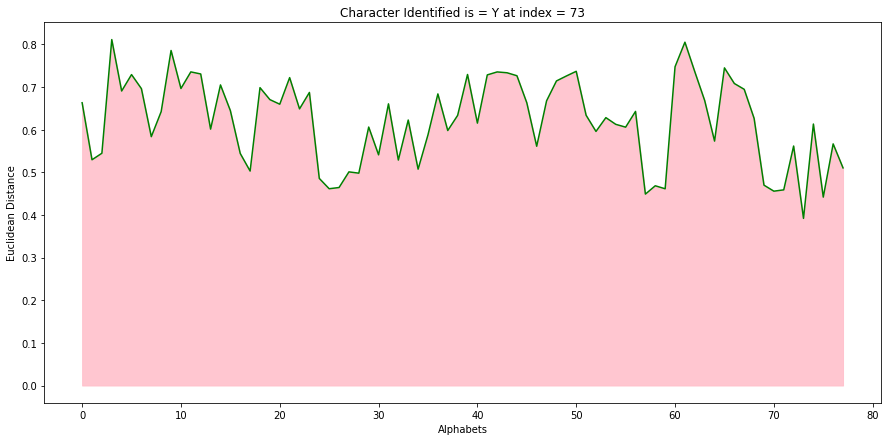

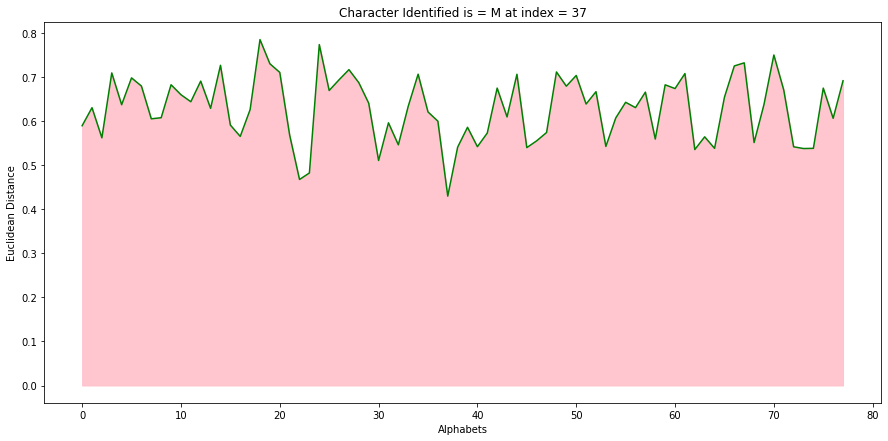

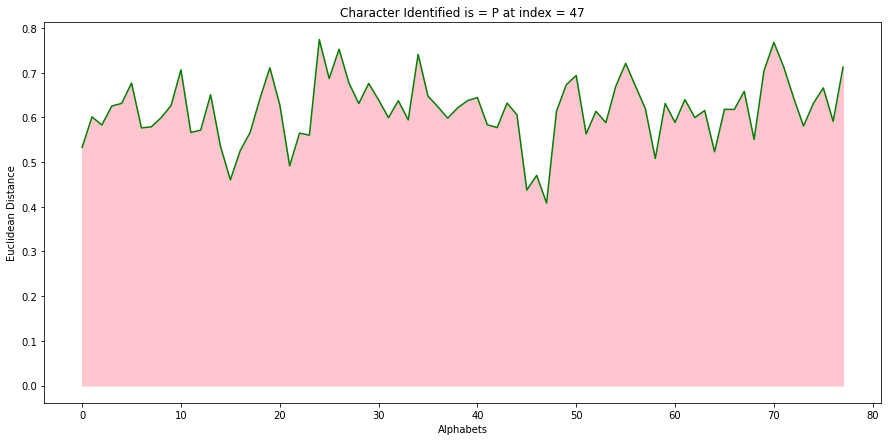

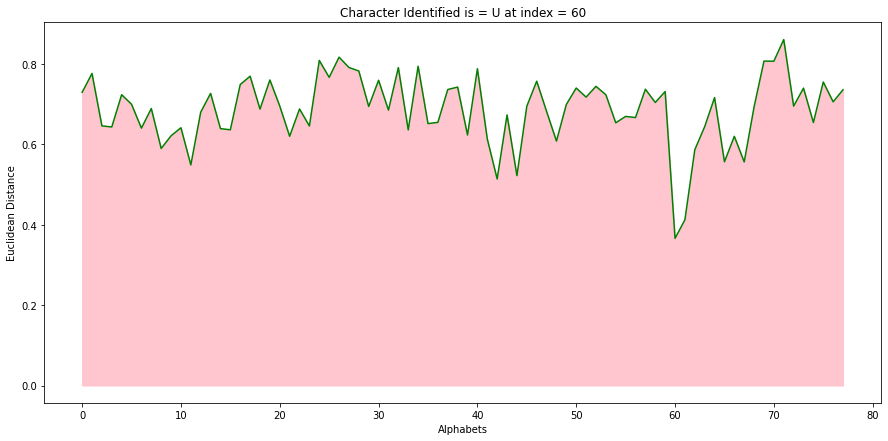

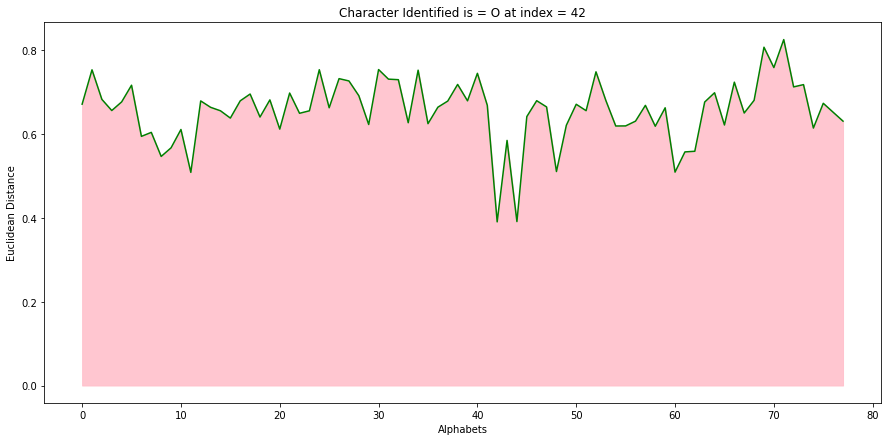

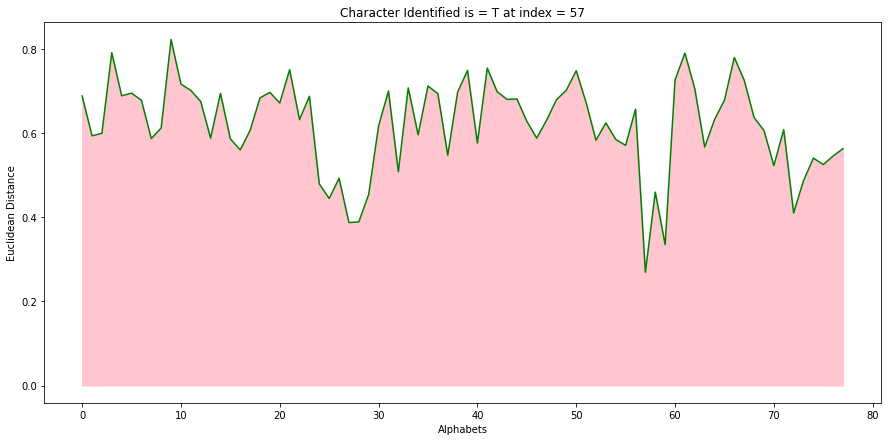

In [ ]:
for i in testing:
  test=cv2.imread("/content/"+i+".jpeg",cv2.IMREAD_GRAYSCALE)
  character=predict_jaccard(test)

## Extracting alphabets from sentences of uppercase letters
### 1) A sentence of uppercase alphabets(non-cursive handwriting) is taken as input.
### 2) Every alphabet is from the sentence is extracted by splitting at some empty space between every alphabet.
### 3) Predicting the results

In [ ]:
def predict_sentence(sentence):
  (thresh, im_bw) = cv2.threshold(sentence, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  thresh = 127
  sentence = cv2.threshold(sentence, thresh, 255, cv2.THRESH_BINARY)[1]
  imshow(sentence)
  i=0
  letters=[]
  count=0
  while(i<sentence.shape[1]):
    while((sentence[:,i]==255).sum()>=(sentence.shape[0]-8) and i<sentence.shape[1]):
      i+=1
      break
    else:
      temp=i
      while((sentence[:,i]==255).sum()<(sentence.shape[0]-8) and i<sentence.shape[1]):
        i+=1
      letters.append([temp,i])
    count+=1
  for i in letters:
    answer=predict_jaccard(sentence[:,i[0]:i[1]])

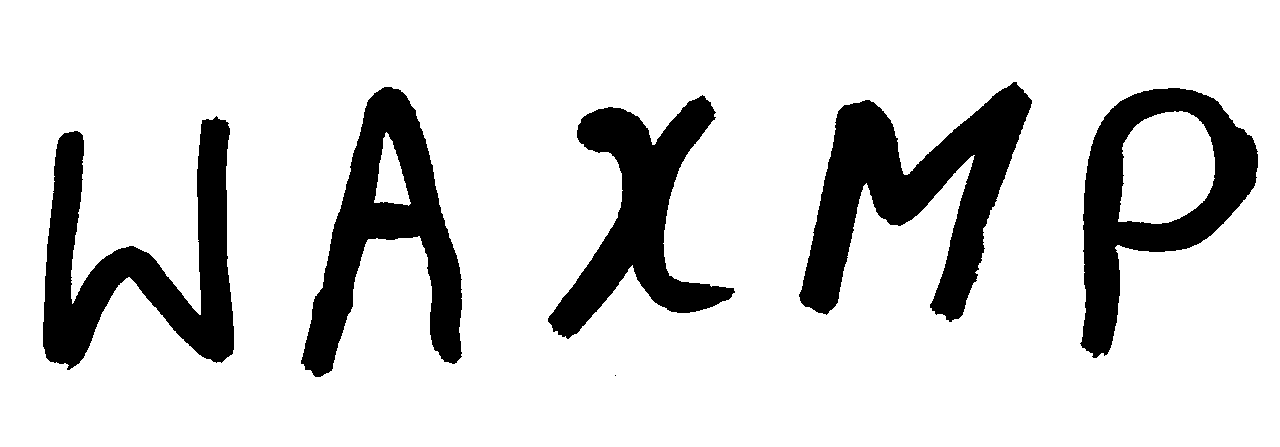

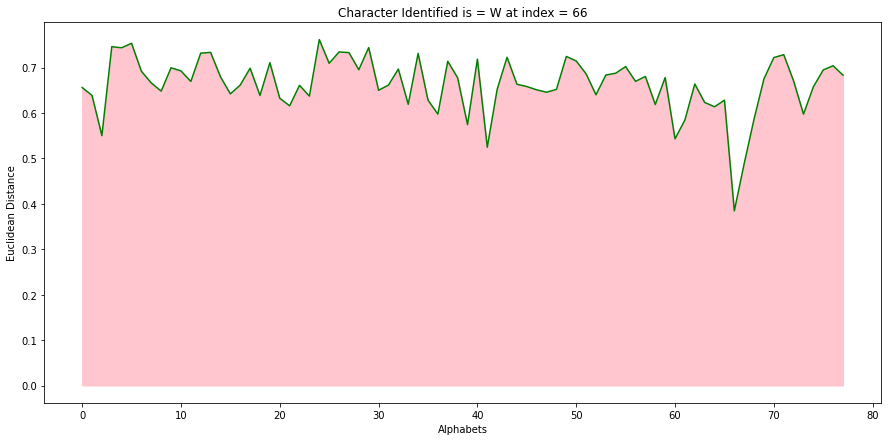

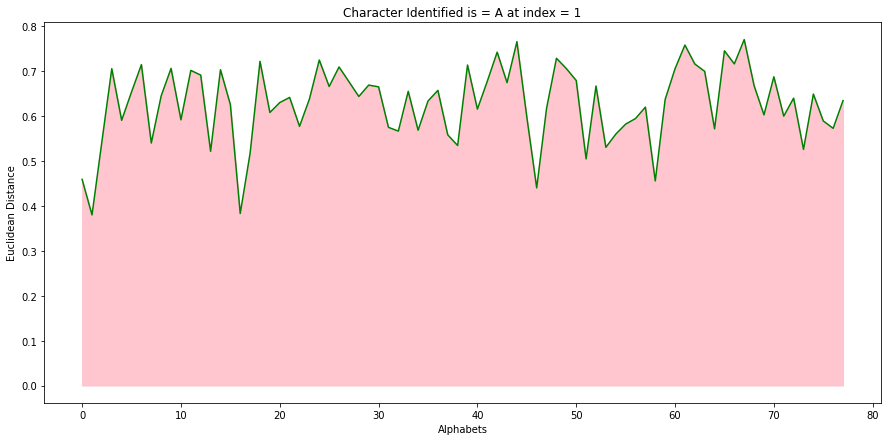

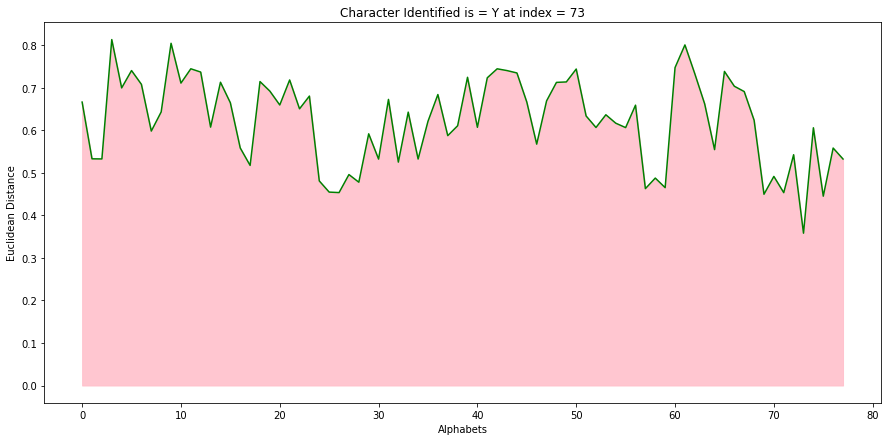

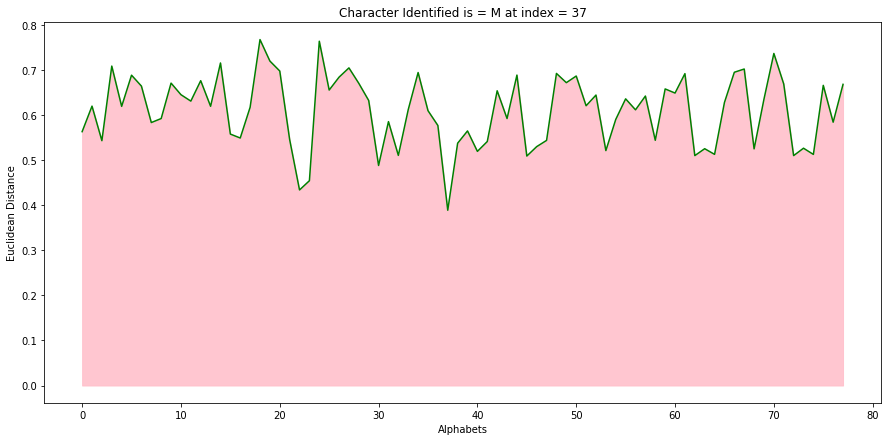

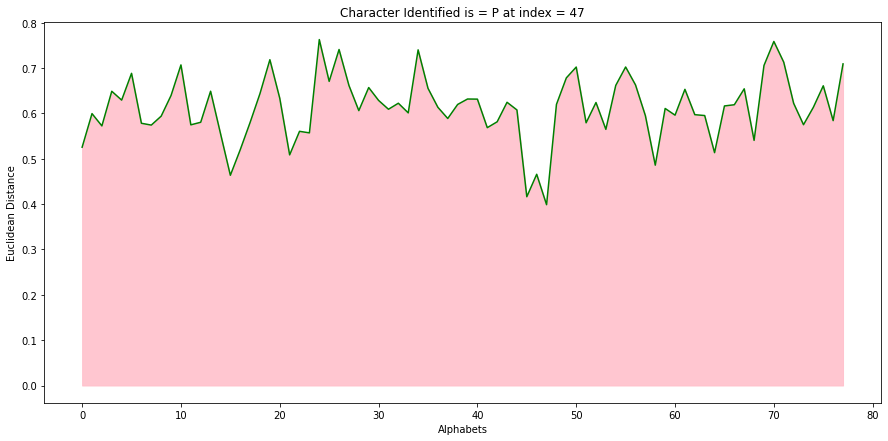

In [ ]:
# Test sample of a sentence
sentence=cv2.imread("/content/test_sentence1.jpeg",cv2.IMREAD_GRAYSCALE)
predict_sentence(sentence)

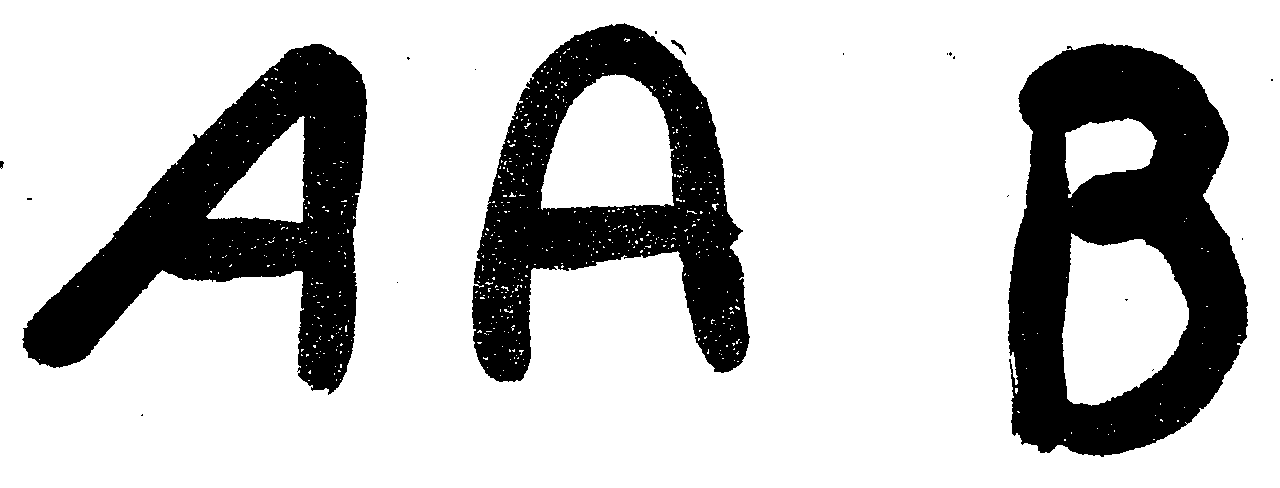

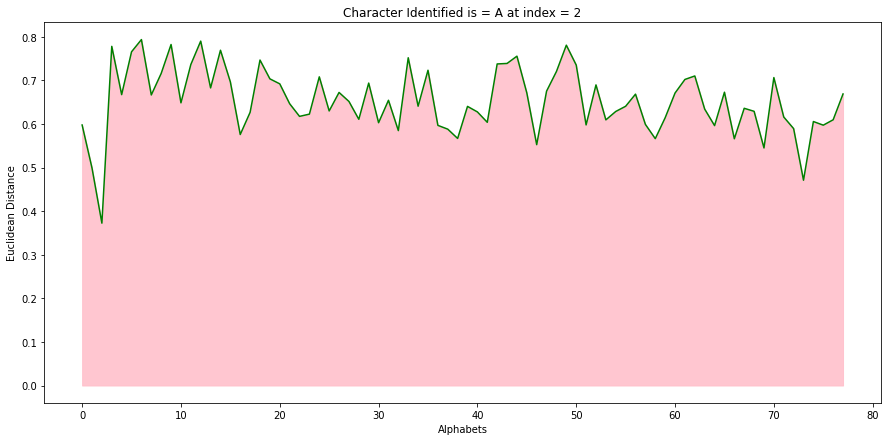

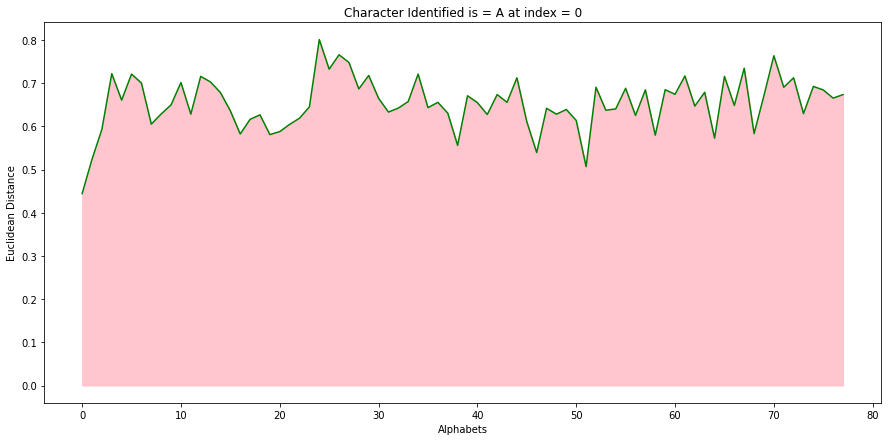

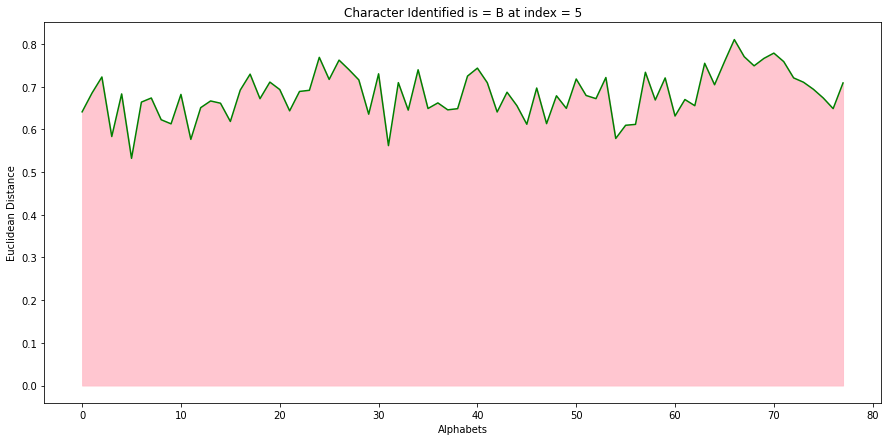

In [ ]:
# Test sample of a sentence
sentence=cv2.imread("/content/test_sentence2.jpeg",cv2.IMREAD_GRAYSCALE)
predict_sentence(sentence)

### Different types of statistical distances used are:-
1.   Braycurtis
2.   Canberra
3.   Chebyshev
4.   Cityblock
5.   Correlation
6.   Cosine
7.   Dice
8.   Euclidean
9.   Hamming
10.  Jaccard
11.  Jensenshannon
12.  Kulsinski
13.  Rogerstanimoto
14.  Russellrao
15.  Sokalnichener
16.  Sokalsneath
17.  Sqeuclidean
18.  Yule
##### Out these, correlation[5], hamming[9], jaccard[10] and kulsinski[12] generated good results when comapred to other distances.
###  * Comparision Metric
#### As this study is being conducted with a small dataset, the comparision metric is defined as :-
#### Accuracy = Ratio of no.of correct predictions(in test samples) to the total no.of test samples.







In [ ]:
from scipy.spatial.distance import braycurtis,canberra,chebyshev,cityblock,correlation,cosine,dice,euclidean,hamming,jaccard,jensenshannon,kulsinski,mahalanobis
from scipy.spatial.distance import rogerstanimoto,russellrao,seuclidean,sokalmichener,sokalsneath,sqeuclidean,yule
def predict_dist(test,distance):
    test=preprocessing(test)
    scores=[]
    for i in range(len(alpha_arr)):
        scores.append(distance(np.array(test).flatten(),np.array(alpha_arr[i]).flatten()))
    plt.figure(figsize=(15,7))
    plt.plot(scores,c="red")
    plt.ylabel("Euclidean Distance")
    plt.xlabel("Alphabets")
    plt.gca().fill_between(range(len(scores)),
                         [0]*len(scores),
                         scores,
                         alpha=0.5,
                         color="lime")
    plt.title("Character Identified is = "+alpha[(scores.index(min(scores)))//3].upper()+" at index = "+str(scores.index(min(scores))))
def predictor(test,distance):
    test=preprocessing(test)
    scores=[]
    for i in range(len(alpha_arr)):
        scores.append(distance(np.array(test).flatten(),np.array(alpha_arr[i]).flatten()))
    return(alpha[(scores.index(min(scores)))//3].upper())
def predict_sentence(sentence,distance):
    (thresh, im_bw) = cv2.threshold(sentence, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    thresh = 127
    sentence = cv2.threshold(sentence, thresh, 255, cv2.THRESH_BINARY)[1]
  #imshow(sentence)
    i=0
    letters=[]
    count=0
    while(i<sentence.shape[1]):
        while((sentence[:,i]==255).sum()>=(sentence.shape[0]-8) and i<sentence.shape[1]):
            i+=1
            break
        else:
            temp=i
            while((sentence[:,i]==255).sum()<(sentence.shape[0]-8) and i<sentence.shape[1]):
                i+=1
            letters.append([temp,i])
        count+=1
    answer=[]
    for i in letters:
        answer.append(predictor(sentence[:,i[0]:i[1]],distance))
    return(answer)

## Test Case-1 

Test sample=  WAXMPUOT

['Distance', 'Predicted', 'Accuracy'] 



Text(0, 0.5, 'Accuracy')

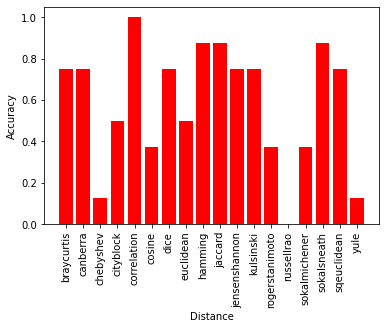

In [ ]:
testing=[i for i in "test_1 test_2 test_3 test_4 test_5 test_6 test_7 test_8".split()]
import re
distances=[braycurtis,canberra,chebyshev,cityblock,correlation,cosine,dice,euclidean,hamming,jaccard,jensenshannon,kulsinski,rogerstanimoto,russellrao,sokalmichener,sokalsneath,sqeuclidean,yule]
print("Test sample=  WAXMPUOT\n")
print(["Distance","Predicted","Accuracy"],"\n")
name=[]
accuracy=[]
prediction=[]
for dist in range(len(distances)):
  y_pred=[]
  for i in testing:
    test=cv2.imread(i+".jpeg",cv2.IMREAD_GRAYSCALE)
    character=predictor(test,distances[dist])
    y_pred.append(character)
  name.append(re.findall("<function ([a-z]+)",str(distances[dist]))[0])
  accuracy.append(np.array(np.array(y_pred)==np.array([i for i in "W A X M P U O T".split()])).sum()/8)
  prediction.append("".join(y_pred))
plt.bar(range(len(distances)),accuracy,color="red")
plt.xticks(range(len(distances)),name)
for i in plt.gca().get_xticklabels():
  i.set_rotation(90)
plt.xlabel("Distance")
plt.ylabel("Accuracy")

## Test Case-2 : Selecting the best distances from the test case-1 which are greater than or equal to 0.875

Test sample=  WAXMP

['Distance', 'Predicted', 'Accuracy'] 



Text(0, 0.5, 'Accuracy')

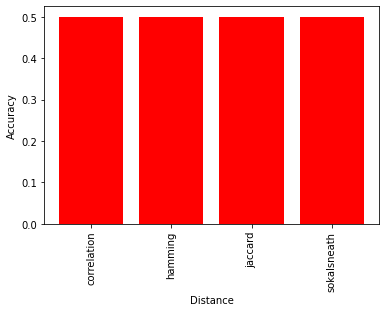

In [ ]:
test=cv2.imread("test_sentence1.jpeg",cv2.IMREAD_GRAYSCALE)
distances=[correlation,hamming,jaccard,sokalsneath]
print("Test sample=  WAXMP\n")
print(["Distance","Predicted","Accuracy"],"\n")
name=[]
accuracy=[]
prediction=[]
for dist in range(len(distances)):
  y_pred=predict_sentence(test,distances[dist])
  name.append(re.findall("<function ([a-z]+)",str(distances[dist]))[0])
  accuracy.append(np.array(np.array(y_pred)==np.array([i for i in "W A X M P".split()])).sum()/8)
  prediction.append("".join(y_pred))
plt.bar(range(len(distances)),accuracy,color="red")
plt.xticks(range(len(distances)),name)
for i in plt.gca().get_xticklabels():
  i.set_rotation(90)
plt.xlabel("Distance")
plt.ylabel("Accuracy")

## Test Case-3 : Taking the distances from test case-2 which are greater than or equal to 0.8

Test sample=  AAB

['Distance', 'Predicted', 'Accuracy'] 



Text(0, 0.5, 'Accuracy')

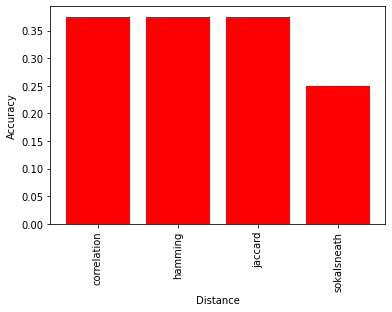

In [ ]:
test=cv2.imread("test_sentence2.jpeg",cv2.IMREAD_GRAYSCALE)
distances=[correlation,hamming,jaccard,sokalsneath]
print("Test sample=  AAB\n")
print(["Distance","Predicted","Accuracy"],"\n")
name=[]
accuracy=[]
prediction=[]
for dist in range(len(distances)):
  y_pred=predict_sentence(test,distances[dist])
  name.append(re.findall("<function ([a-z]+)",str(distances[dist]))[0])
  accuracy.append(np.array(np.array(y_pred)==np.array([i for i in "A A B".split()])).sum()/8)
  prediction.append("".join(y_pred))
plt.bar(range(len(distances)),accuracy,color="red")
plt.xticks(range(len(distances)),name)
for i in plt.gca().get_xticklabels():
  i.set_rotation(90)
plt.xlabel("Distance")
plt.ylabel("Accuracy")

## * Conclusions :-
### From the above test cases, all the distances are checked and 


1.   Correlation
2.   Hamming
3.   Jaccard

###### distances performed well in recognizing uppercase alphabets.

Note : As the dataset is small, accuacy measures are ignored in conclusion.



# * Advantages:
## 1) Simple statistical distances are used.
## 2) Easy image processing techniques.
## 3) Works well with more training data.

# * Disadvantages:
### 1) Test sample is compared against every training sample.
### 2) Much amount of noise effects prediction.

# * Future Scope:
### 1) More training dataset is taken.
### 2) Efficient noise handling techniques are used.
### 3) Can be sccaled to recognize all characters.
### 4) Cursive writing sentences identification.
### 5) Time complexity reduction.

# **Dhanyavad !**